### Installation
1. Run the first 2 cells
2. Restart runtime
3. Run the rest of the jupyter notebooks (do not run the first 2 cells again)

In [ ]:
!git clone https://github.com/zcemycl/TF2DeepFloorplan.git
!pip install gdown
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/uc?id=1czUSFvk6Z49H-zRikTc67g2HUUz4imON
!unzip log.zip
!rm log.zip

Cloning into 'TF2DeepFloorplan'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 142 (delta 55), reused 53 (delta 19), pack-reused 37
Receiving objects: 100% (142/142), 406.06 KiB | 4.37 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
# gpu
!pip install matplotlib numpy opencv-python pdbpp tensorboard tensorflow scipy Pillow gdown
# cpu
# !pip install matplotlib numpy opencv-python pdbpp tensorboard tensorflow-cpu scipy Pillow gdown

### Main Script

In [ ]:
import tensorflow as tf
import sys
sys.path.append('./TF2DeepFloorplan/')
sys.path.append('./TF2DeepFloorplan/dfp')
from dfp.net import *
from dfp.data import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from argparse import Namespace
import os
import gc
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
sys.path.append('./TF2DeepFloorplan/dfp/utils/')
from dfp.utils.rgb_ind_convertor import *
from dfp.utils.util import *
from dfp.utils.legend import *
from dfp.deploy import *
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [ ]:
inp = mpimg.imread('./TF2DeepFloorplan/resources/30939153.jpg')

In [ ]:
args = Namespace(image='./TF2DeepFloorplan/resources/30939153.jpg',
        weight='./log/store/G',loadmethod='log',
        postprocess=True,colorize=True,
        save=None)
result = main(args)

./TF2DeepFloorplan/utils/util.py:30: UserWarning: ignoring size because footprint is set
  footprint=el))


(600, 419, 3) (600, 419, 3)


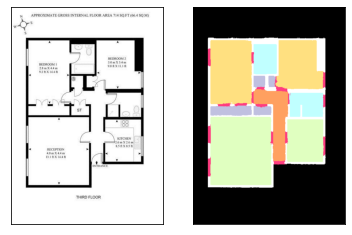

In [ ]:
plt.subplot(1,2,1)
plt.imshow(inp); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(result); plt.xticks([]); plt.yticks([]);

## Breakdown of postprocessing (step by step)

In [ ]:
model,img,shp = init(args)
logits_cw,logits_r = predict(model,img,shp)

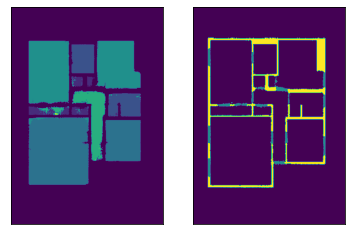

In [ ]:
logits_r = tf.image.resize(logits_r,shp[:2])
logits_cw = tf.image.resize(logits_cw,shp[:2])
r = convert_one_hot_to_image(logits_r)[0].numpy()
cw = convert_one_hot_to_image(logits_cw)[0].numpy()
plt.subplot(1,2,1)
plt.imshow(r.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw.squeeze()); plt.xticks([]); plt.yticks([]);

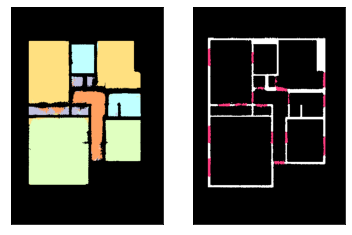

In [ ]:
r_color,cw_color = colorize(r.squeeze(),cw.squeeze())
plt.subplot(1,2,1)
plt.imshow(r_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw_color); plt.xticks([]); plt.yticks([]);

./TF2DeepFloorplan/utils/util.py:30: UserWarning: ignoring size because footprint is set
  footprint=el))


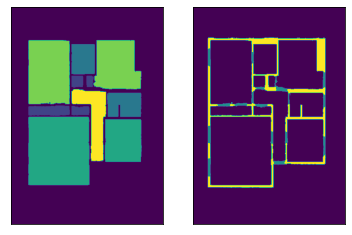

In [ ]:
newr,newcw = post_process(r,cw,shp)
plt.subplot(1,2,1)
plt.imshow(newr.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw.squeeze()); plt.xticks([]); plt.yticks([]);

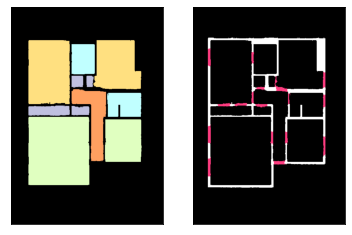

In [ ]:
newr_color,newcw_color = colorize(newr.squeeze(),newcw.squeeze())
plt.subplot(1,2,1)
plt.imshow(newr_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw_color); plt.xticks([]); plt.yticks([]);

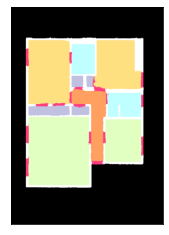

In [ ]:
plt.imshow(newr_color+newcw_color); plt.xticks([]); plt.yticks([]);

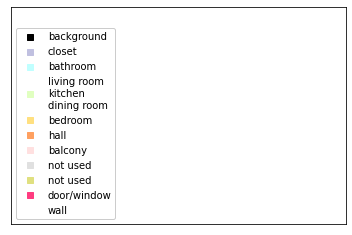

In [ ]:
over255 = lambda x: [p/255 for p in x]
colors2 = [over255(rgb) for rgb in list(floorplan_fuse_map.values())]
colors = ["background", "closet", "bathroom",
          "living room\nkitchen\ndining room",
          "bedroom","hall","balcony","not used","not used",
          "door/window","wall"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors2[i]) for i in range(len(colors))]
labels = colors
legend = plt.legend(handles, labels, loc=3,framealpha=1, frameon=True)

fig  = legend.figure
fig.canvas.draw()
plt.xticks([]); plt.yticks([]);
